<a href="https://colab.research.google.com/github/boatbotgithub/CreateLinearRegression/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
class NeuralNetwork(object):
    # constructor กำหนด Paramiter ต่าง ๆ
    def __init__(self, data_x, data_y,
                w_init = None, b_init = None, learning_rate = 0.1 ):
        
        scale = 4.0
        self.x = data_x
        self.y = data_y
        self.lr = learning_rate
        
        
        #เอาไว้เก็บการ updata หรือ history ต่างๆ
        self.loss_history = []
        self.epochs = []
        self.w_history = []
        self.b_history = []
        
        if w_init is not None:
            #self.w = w_init 
            self.w = np.random.uniform(low = -w_init, high = w_init, size = (4, 1))
            #print(f"Weigth shape {self.shape}")
            
        else:
            #init w
            self.w = np.random.uniform(low = a - scale, high = a + scale)
        
        if b_init is not None:
            #self.b = b_init
            self.b = np.random.uniform(low = -b_init, high = b_init, size = (1, 1))
        else:
            #init b
            self.b = np.random.uniform(low = a - scale, high = a + scale)
        
        
    def sigmoid(self ,X):
        return 1/(1+np.exp(-X))

    
    def inference(self, x):
        y_pred = np.dot(x, self.w) + self.b
        
        return y_pred
   

    def loss_function(self, labels, prediction):
        #MSE        
        loss = np.mean((prediction - labels)**2)
        
        return loss
    
        
    def loss_derivative(self):
       
        dw = np.mean((self.y_pred - self.y) * self.x)
        db = np.mean(self.y_pred - self.y)
        
        return dw, db
    
    def updata_weights(self):
        
        self.w = self.w - self.lr * self.dw
        self.b = self.b - self.lr * self.db
        
    def history(self, loss, w, b):
        
        self.loss_history.append(loss)
        self.w_history.append(w)
        self.b_history.append(b)
        
    def fit(self, max_epoch):
        
        pre_loss = 0.
        for epoch in range(max_epoch):
            
            print(epoch)
            self.y_pred = self.inference(self.x)
            self.sigmoid(self.y_pred)
            self.loss = self.loss_function(self.y, self.y_pred)
            self.history(self.loss, self.w, self.b)

            self.dw, self.db = self.loss_derivative()
            self.updata_weights()
                
            self.loss = self.loss_function(self.y, self.y_pred)
            self.history(self.loss, self.w, self.b)
            print(f"Epoch {epoch+1} loss: {self.loss}")
            pre_loss = self.loss
            
        self.epochs.append(epoch)
        self.w_history = np.array(self.w_history)
        self.b_history = np.array(self.b_history)

In [ ]:
data = load_iris()
data_x = data.data
data_y = data.target
data_y.resize(150, 1)

In [ ]:
epoch = 10
model = NeuralNetwork(data_x, data_y, 2, 1, 0.001)
model.fit(epoch)

0
Epoch 1 loss: 273.6083658099381
1
Epoch 2 loss: 246.22713937820808
2
Epoch 3 loss: 221.58769166718267
3
Epoch 4 loss: 199.41547862770733
4
Epoch 5 loss: 179.4634472821643
5
Epoch 6 loss: 161.5092829457587
6
Epoch 7 loss: 145.35293209332406
7
Epoch 8 loss: 130.81437327027913
8
Epoch 9 loss: 117.731611210194
9
Epoch 10 loss: 105.95887180849496


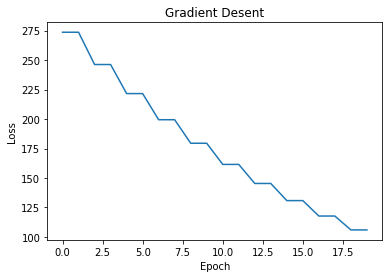

In [ ]:
plt.plot(model.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Gradient Desent")
plt.show()